In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
## Installed fbprophet
from prophet import Prophet
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
##import the dataset
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#dataset
fd=pd.read_excel('gdrive/My Drive/Sales+Assembly_Python_1.xlsx')
fd.head()
fd.shape

,Date(Monthly),Product,Sales,Sales Price
0,2016-04-01,Water Seal RW,8,42400
1,2016-04-08,Water Seal RW,6,31800
2,2016-04-15,Water Seal RW,3,15900
3,2016-04-22,Water Seal RW,5,26500
4,2016-04-29,Water Seal RW,8,42400


(210, 4)

In [ ]:
#Summary Statistics
fd.describe()

,Sales,Sales Price
count,210.000000,210.000000
mean,7.780952,41239.047619
std,1.705499,9039.143958
min,3.000000,15900.000000
25%,7.000000,37100.000000
50%,8.000000,42400.000000
75%,9.000000,47700.000000
max,13.000000,68900.000000


In [ ]:
## Checking for missing values
fd.isnull().sum()
fd.columns
fd.dtypes

Date(Monthly)    0
Product          0
Sales            0
Sales Price      0
dtype: int64

Index(['Date(Monthly)', 'Product', 'Sales', 'Sales Price'], dtype='object')

Date(Monthly)    datetime64[ns]
Product                  object
Sales                     int64
Sales Price               int64
dtype: object

In [ ]:
#dropping columns that are not required for the analysis
fd.drop(columns=['Product','Sales Price'],inplace=True)
fd.head()
fd.shape

,Date(Monthly),Sales
0,2016-04-01,8
1,2016-04-08,6
2,2016-04-15,3
3,2016-04-22,5
4,2016-04-29,8


(210, 2)

In [ ]:
#Renaming the columns
fd = fd.rename(columns={'Sales':'y','Date(Monthly)':'ds'})
fd = fd.sort_index(axis=1)
fd.head()

,ds,y
0,2016-04-01,8
1,2016-04-08,6
2,2016-04-15,3
3,2016-04-22,5
4,2016-04-29,8


In [ ]:
# split data into Test & train
train,test = fd[:147],fd[147:]
train.shape
test.shape

(147, 2)

(63, 2)

In [ ]:
train.tail(10)
test.head(12)

,ds,y
137,2018-11-16,7
138,2018-11-23,7
139,2018-11-30,8
140,2018-12-07,7
141,2018-12-14,9
142,2018-12-21,10
143,2018-12-28,11
144,2019-01-04,13
145,2019-01-11,10
146,2019-01-18,9


,ds,y
147,2019-01-25,8
148,2019-02-01,9
149,2019-02-08,8
150,2019-02-15,7
151,2019-02-22,7
152,2019-03-01,7
153,2019-03-08,7
154,2019-03-15,7
155,2019-03-22,8
156,2019-03-29,7


In [ ]:
#Timeseries Model
my_forecast = Prophet(interval_width=0.95) 

In [ ]:
my_forecast.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplvxvsyjd/r39o6kgm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplvxvsyjd/mxg0uj7h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36636', 'data', 'file=/tmp/tmplvxvsyjd/r39o6kgm.json', 'init=/tmp/tmplvxvsyjd/mxg0uj7h.json', 'output', 'file=/tmp/tmp803jmv1a/prophet_model-20220818111942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Predition 60 days future price
forecast_periods = my_forecast.make_future_dataframe(periods=60, include_history=True,freq='D')
forecast_periods

,ds
0,2016-04-01
1,2016-04-08
2,2016-04-15
3,2016-04-22
4,2016-04-29
...,...
202,2019-03-15
203,2019-03-16
204,2019-03-17
205,2019-03-18


In [ ]:
## predicted seasonality and trend
forecast = my_forecast.predict(forecast_periods)
forecast.head(10)
forecast.to_csv('forecast.csv')
forecast1 = forecast.loc[:,['ds','yhat']]  ## predicted passengers - forecast timeframe and passengers  
forecast1.head(10)
forecast3 = forecast.loc[:,['ds','yhat','yhat_lower','yhat_upper']]
forecast3.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-04-01,6.941155,3.266907,9.103424,6.941155,6.941155,-0.779790,-0.779790,-0.779790,-0.779790,-0.779790,-0.779790,0.0,0.0,0.0,6.161365
1,2016-04-08,6.947713,2.899531,8.549720,6.947713,6.947713,-1.173377,-1.173377,-1.173377,-1.173377,-1.173377,-1.173377,0.0,0.0,0.0,5.774336
2,2016-04-15,6.954270,2.846224,8.721380,6.954270,6.954270,-1.133447,-1.133447,-1.133447,-1.133447,-1.133447,-1.133447,0.0,0.0,0.0,5.820823
3,2016-04-22,6.960828,3.246384,8.768360,6.960828,6.960828,-0.866911,-0.866911,-0.866911,-0.866911,-0.866911,-0.866911,0.0,0.0,0.0,6.093917
4,2016-04-29,6.967386,3.756548,9.222403,6.967386,6.967386,-0.538429,-0.538429,-0.538429,-0.538429,-0.538429,-0.538429,0.0,0.0,0.0,6.428956
5,2016-05-06,6.973943,4.184703,9.586281,6.973943,6.973943,-0.111691,-0.111691,-0.111691,-0.111691,-0.111691,-0.111691,0.0,0.0,0.0,6.862252
6,2016-05-13,6.980501,4.638311,10.181274,6.980501,6.980501,0.424598,0.424598,0.424598,0.424598,0.424598,0.424598,0.0,0.0,0.0,7.405099
7,2016-05-20,6.987059,5.047266,10.760099,6.987059,6.987059,0.857693,0.857693,0.857693,0.857693,0.857693,0.857693,0.0,0.0,0.0,7.844751
8,2016-05-27,6.993616,4.795620,10.697944,6.993616,6.993616,0.937330,0.937330,0.937330,0.937330,0.937330,0.937330,0.0,0.0,0.0,7.930946
9,2016-06-03,7.000174,4.863059,10.517949,7.000174,7.000174,0.720761,0.720761,0.720761,0.720761,0.720761,0.720761,0.0,0.0,0.0,7.720935


,ds,yhat
0,2016-04-01,6.161365
1,2016-04-08,5.774336
2,2016-04-15,5.820823
3,2016-04-22,6.093917
4,2016-04-29,6.428956
5,2016-05-06,6.862252
6,2016-05-13,7.405099
7,2016-05-20,7.844751
8,2016-05-27,7.930946
9,2016-06-03,7.720935


,ds,yhat,yhat_lower,yhat_upper
0,2016-04-01,6.161365,3.266907,9.103424
1,2016-04-08,5.774336,2.899531,8.549720
2,2016-04-15,5.820823,2.846224,8.721380
3,2016-04-22,6.093917,3.246384,8.768360
4,2016-04-29,6.428956,3.756548,9.222403


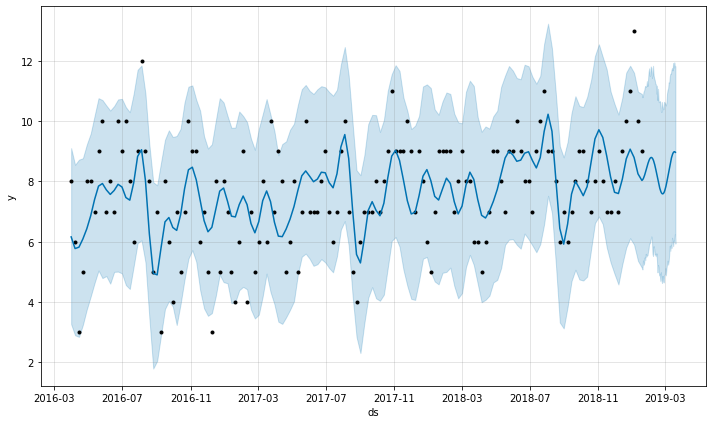

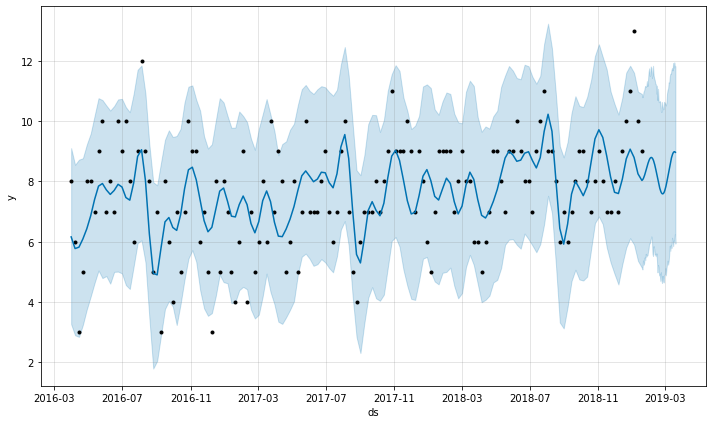

In [ ]:
#Ploting the forecasting values in a line graph
my_forecast.plot(forecast,uncertainty=True)

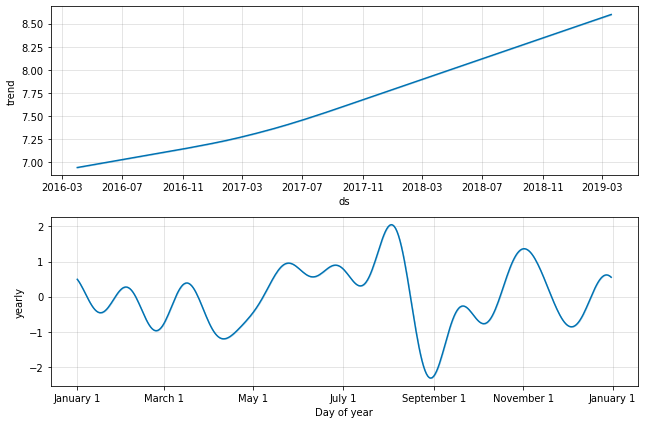

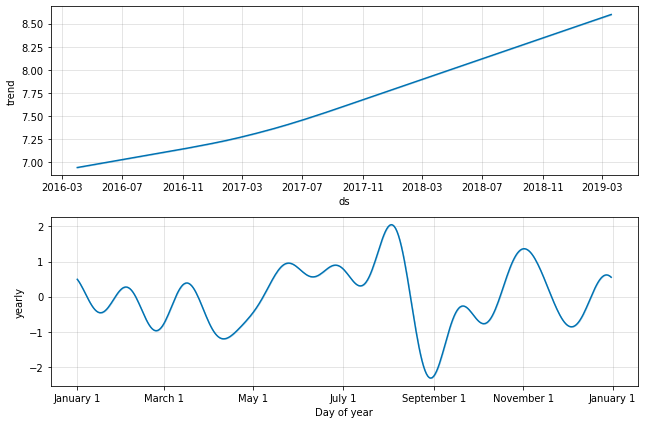

In [ ]:
my_forecast.plot_components(forecast,uncertainty=True)

In [ ]:
## We merge our predicted values with test data

final_df = pd.merge(forecast1,test, on='ds', how='inner')
final_df.head()
final_df.tail()

,ds,yhat,y
0,2019-01-25,8.339019,8
1,2019-02-01,8.745177,9
2,2019-02-08,8.681209,8
3,2019-02-15,8.113842,7
4,2019-02-22,7.622662,7


,ds,yhat,y
3,2019-02-15,8.113842,7
4,2019-02-22,7.622662,7
5,2019-03-01,7.759381,7
6,2019-03-08,8.419773,7
7,2019-03-15,8.946425,7


In [ ]:
#Renamed to original column names
final_df = final_df.rename(columns = {'yhat':'Prophet_Prediction','y':'actual'})

In [ ]:
final_df

,ds,Prophet_Prediction,actual
0,2019-01-25,8.339019,8
1,2019-02-01,8.745177,9
2,2019-02-08,8.681209,8
3,2019-02-15,8.113842,7
4,2019-02-22,7.622662,7
5,2019-03-01,7.759381,7
6,2019-03-08,8.419773,7
7,2019-03-15,8.946425,7


In [ ]:
final_df.set_index('ds',inplace=True)
final_df

,Prophet_Prediction,actual
ds,,
2019-01-25,8.339019,8
2019-02-01,8.745177,9
2019-02-08,8.681209,8
2019-02-15,8.113842,7
2019-02-22,7.622662,7
2019-03-01,7.759381,7
2019-03-08,8.419773,7
2019-03-15,8.946425,7


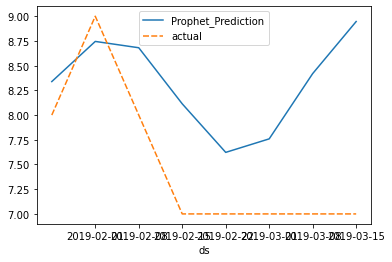

In [ ]:
#SNS plot showing the actual vs prophet predicted
sns.lineplot(data = final_df)

In [ ]:
import numpy as np
from sklearn import metrics

In [ ]:
#Mean absolute error
np.round(metrics.mean_absolute_error(final_df.Prophet_Prediction, final_df.actual),2)

0.89

In [ ]:
#Mean absolute percentage error
print('Prophet MAPE')
np.mean(np.abs((final_df.actual - final_df.Prophet_Prediction)/final_df.actual))*100

Prophet MAPE


12.416030394781785

In [ ]:
#Splitting data into train and test for Arima model
train = train.iloc[::-1]
test = test[::-1]

In [ ]:
train.head()
test.head()
train.set_index('ds',inplace=True)
test.set_index('ds',inplace=True)

,ds,y
146,2019-01-18,9
145,2019-01-11,10
144,2019-01-04,13
143,2018-12-28,11
142,2018-12-21,10


,ds,y
209,2020-04-03,9
208,2020-03-27,10
207,2020-03-20,9
206,2020-03-13,8
205,2020-03-06,7


In [ ]:
train.head()

,y
ds,
2019-01-18,9
2019-01-11,10
2019-01-04,13
2018-12-28,11
2018-12-21,10


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 48.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# fitting a stepwise model:
from pmdarima import auto_arima
Arima_model = auto_arima(train, start_p=0, start_q=0, d=1, max_p=8, max_q=8,max_d =2,start_P=0, start_Q=0, max_P=8, max_Q=8,m=1,
                          seasonal=True,trace=True, error_action='warn',suppress_warnings= True, 
                          stepwise=True, random_state= 20, n_fits= 2)

Arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=605.178, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=591.936, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=579.189, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=603.180, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=577.438, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=561.898, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=589.947, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=563.792, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=563.817, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=565.937, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=586.879, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=565.131, Time=0.1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  147
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -277.949
Date:                Thu, 18 Aug 2022   AIC                            561.898
Time:                        11:19:59   BIC                            570.849
Sample:                             0   HQIC                           565.535
                                - 147                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4037      0.086      4.710      0.000       0.236       0.572
ma.L1         -0.9647      0.023    -42.378      0.000      -1.009      -0.920
sigma2         2.6036      0.325      8.013      0.000       1.967       3.241
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.30
Prob(Q):                              0.73   Prob(JB):                         0.86
Heteroskedasticity (H):               2.85   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Arima model prediction for 60 future days
prediction = pd.DataFrame(Arima_model.predict(n_periods=63), index = test.index)
prediction.columns = ['Arima_Prediction']
prediction

,Arima_Prediction
ds,
2020-04-03,7.575636
2020-03-27,7.404321
2020-03-20,7.335161
2020-03-13,7.307242
2020-03-06,7.295971
...,...
2019-02-22,7.288340
2019-02-15,7.288340
2019-02-08,7.288340


In [ ]:
#Merging the values of the predicted arima model with actual
final_df = pd.merge(final_df, prediction, how = 'inner', on = 'ds')

In [ ]:
# Predicted values of Prophet vs Arima vs Actual
final_df

,Prophet_Prediction,actual,Arima_Prediction
ds,,,
2019-01-25,8.339019,8,7.28834
2019-02-01,8.745177,9,7.28834
2019-02-08,8.681209,8,7.28834
2019-02-15,8.113842,7,7.28834
2019-02-22,7.622662,7,7.28834
2019-03-01,7.759381,7,7.28834
2019-03-08,8.419773,7,7.28834
2019-03-15,8.946425,7,7.28834


In [ ]:
#Mean absolute error
metrics.mean_absolute_error(final_df.actual, final_df.Arima_Prediction)

0.5720849949611706

In [ ]:
#Mean absolute percentage error
print('Prophet MAPE')
np.mean(np.abs((final_df.actual - final_df.Arima_Prediction)/final_df.actual))*100

Prophet MAPE


7.175707252290513

In [ ]:
#Means absolute error of prophet and arima
print('Prophet MAE')
round(metrics.mean_absolute_error(final_df.actual, final_df.Prophet_Prediction),2)
print()
print('ARIMA MAE')
round(metrics.mean_absolute_error(final_df.actual, final_df.Arima_Prediction),2)
print()

Prophet MAE


0.89


ARIMA MAE


0.57

In [ ]:
# Holt-Winter model
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HW

In [ ]:
# 60 days future prediction
model = HW(train.y, seasonal_periods=60, trend='add', seasonal='mul')
fitted = model.fit(optimized=True, use_brute=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [ ]:
#create a forcast for the next 60 steps beyond the final data point in the training data set
Prediction = fitted.forecast(steps=63)
HW_Prediction=pd.DataFrame(Prediction)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [ ]:
HW_Prediction

,0
147,5.676674
148,4.266839
149,5.556561
150,4.903424
151,5.027376
...,...
205,2.557576
206,2.811323
207,2.188493
208,1.617839


In [ ]:
#print out the training summary
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                        y   No. Observations:                  147
Model:             ExponentialSmoothing   SSE                            277.286
Optimized:                         True   AIC                            221.289
Trend:                         Additive   BIC                            412.677
Seasonal:                Multiplicative   AICC                           331.839
Seasonal Periods:                    60   Date:                 Thu, 18 Aug 2022
Box-Cox:                          False   Time:                         11:20:00
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.5032874                alpha                 True
smoothing_trend          

In [ ]:
HW_Prediction.columns = ['HW_Prediction']

In [ ]:
#predicted values
HW_Prediction

,HW_Prediction
147,5.676674
148,4.266839
149,5.556561
150,4.903424
151,5.027376
...,...
205,2.557576
206,2.811323
207,2.188493
208,1.617839


In [ ]:
HW_Prediction.set_index(test.index,inplace=True)

In [ ]:
HW_Prediction
test

,HW_Prediction
ds,
2020-04-03,5.676674
2020-03-27,4.266839
2020-03-20,5.556561
2020-03-13,4.903424
2020-03-06,5.027376
...,...
2019-02-22,2.557576
2019-02-15,2.811323
2019-02-08,2.188493


,y
ds,
2020-04-03,9
2020-03-27,10
2020-03-20,9
2020-03-13,8
2020-03-06,7
...,...
2019-02-22,7
2019-02-15,7
2019-02-08,8


In [ ]:
# merging the columns with previous results
final_df = pd.merge(final_df, HW_Prediction, how = 'inner', on ='ds')

In [ ]:
# renaming the column
final_df = final_df.rename(columns = {'y':'actual'})

In [ ]:
# Predicted values of Prophet vs Ariam vs Holt-winter vs Actual
final_df

,Prophet_Prediction,actual,Arima_Prediction,HW_Prediction
ds,,,,
2019-01-25,8.339019,8,7.28834,2.070789
2019-02-01,8.745177,9,7.28834,1.617839
2019-02-08,8.681209,8,7.28834,2.188493
2019-02-15,8.113842,7,7.28834,2.811323
2019-02-22,7.622662,7,7.28834,2.557576
2019-03-01,7.759381,7,7.28834,2.099967
2019-03-08,8.419773,7,7.28834,2.241123
2019-03-15,8.946425,7,7.28834,2.650925


In [ ]:
#mean absolute error
print('Holt Winters MAE')
round(metrics.mean_absolute_error(final_df.actual, final_df.HW_Prediction),2)

Holt Winters MAE


5.22

In [ ]:
#mean absolute percentage error
print('Holt Winters MAPE')
np.mean(np.abs((final_df.actual - final_df.HW_Prediction)/final_df.actual))*100

Holt Winters MAPE


69.02481142928704

In [ ]:
#Mean absolute error values of 3 models
print('Prophet MAE')
round(metrics.mean_absolute_error(final_df.actual, final_df.Prophet_Prediction),2)
print()
print('ARIMA MAE')
round(metrics.mean_absolute_error(final_df.actual, final_df.Arima_Prediction),2)
print()
print('Holt Winters MAE')
round(metrics.mean_absolute_error(final_df.actual, final_df.HW_Prediction),2)

Prophet MAE


0.89


ARIMA MAE


0.57


Holt Winters MAE


5.22